¡Hola Francisco! Como te va?

Mi nombre es Emanuel Fitta! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Francisco, antes que nada quiero felicitarte por el enorme esfuerzo que has puesto en este proyecto. Hay un par de detalles que podemos mejorar, el primero tiene que ver con lo gráficos, es importante colocar más graficos que puedan reflejar los insights que vas obteniendo, así como conclusiones relacionadas a los mismos. Por otro lado, aunque colcoaste tus observaciones en algunos puntos del proyecto, te recomendaría que esto lo hicieras en cada gráfico y cada resultado importante que vayas obteniendo. Así mismo valdría mucho la pena el profundizar en el análisis e indagar más.
    
Sin más por el momento, te deseo que tengas un excelente día. 

# Acceder a los datos y prepáralos para el análisis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visits_log = pd.read_csv('/datasets/visits_log_us.csv')
orders_log = pd.read_csv('/datasets/orders_log_us.csv')
costs_us = pd.read_csv('/datasets/costs_us.csv')

.

In [4]:
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [17]:
visits_log['uid'] = visits_log['uid'].astype(str)

In [6]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


.

In [7]:
orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [18]:
orders_log['uid'] = orders_log['uid'].astype(str)

In [9]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


.

In [10]:
costs_us.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [11]:
costs_us['source_id'] = costs_us['source_id'].astype(str)

In [12]:
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   object 
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), object(2)
memory usage: 59.7+ KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien Francisco, empezamos bien, utilizaste de manera correcta los métodos info y head para dar un vistazo general del dataframe de visitas. 

.

In [13]:
# Renombrar columnas
visits_log.columns = ["device", "end_ts","source_id", "start_ts","uid" ]
orders_log.columns = ["buy_ts", "revenue", "uid",]
costs_us.columns = ["source_id", "date", "cost"] 

In [14]:
# Convertir las columnas de fecha a tipo datetime
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'])
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'])
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'])
costs_us['date'] = pd.to_datetime(costs_us['date'])

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto, cambiar los nombres de las columnas a snake case es una buena práctica. Por otro lado, te felicito por haber hecho un buen uso de to_datetime para transformar al formato correcto las fechas.

# Informe y cálculo de métricas


### Visitas

In [15]:
# Usuarios por día, semana y mes

daily_users = visits_log.groupby(visits_log['start_ts'].dt.date)['uid'].nunique()

weekly_users = visits_log.groupby(visits_log['start_ts'].dt.to_period('W'))['uid'].nunique()

monthly_users = visits_log.groupby(visits_log['start_ts'].dt.to_period('M'))['uid'].nunique()


In [26]:
daily_users.head(10)    

start_ts
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
2017-06-06    797
2017-06-07    699
2017-06-08    868
2017-06-09    695
2017-06-10    350
Name: uid, dtype: int64

Con este calculo, podemor ver la cantidad de usuarios por día que visitan el sitio

In [29]:
weekly_users.head(10)

start_ts
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
2017-07-03/2017-07-09    3294
2017-07-10/2017-07-16    4355
2017-07-17/2017-07-23    3841
2017-07-24/2017-07-30    2655
2017-07-31/2017-08-06    2364
Freq: W-SUN, Name: uid, dtype: int64

Aquí, vemos la cantidad de usuarios que visitan el sitio por semana

In [30]:
monthly_users.head()

start_ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: uid, dtype: int64

Para finalizar, acá vemos cuantos usuarios por mes visitan el sitio de Showz

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

La solución que propones es correcta! Haces un buen uso de dt, así como de las agrupaciones. Muy bien!

In [21]:
# Número de sesiones por día
daily_sessions = visits_log.groupby(visits_log['start_ts'].dt.date)['start_ts'].count()

In [68]:
daily_sessions.head(10)

start_ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
2017-06-06    875
2017-06-07    788
2017-06-08    939
2017-06-09    755
2017-06-10    375
Name: start_ts, dtype: int64

In [22]:
# Duración de cada sesión
visits_log['Session Duration'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.total_seconds()
average_session_duration = visits_log.groupby(visits_log['start_ts'].dt.date)['Session Duration'].mean()

In [70]:
average_session_duration.head(10)

start_ts
2017-06-01    666.320783
2017-06-02    619.840426
2017-06-03    606.958071
2017-06-04    554.309804
2017-06-05    624.450168
2017-06-06    646.416000
2017-06-07    643.722081
2017-06-08    690.940362
2017-06-09    600.686093
2017-06-10    505.600000
Name: Session Duration, dtype: float64

In [23]:
# Frecuencia de retorno de usuarios
visits_log['Visit Count'] = visits_log.groupby('uid')['start_ts'].transform('count')
returning_users = visits_log[visits_log['Visit Count'] > 1]['uid'].nunique()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Correcto! La manera de identificar las sesiones es mediante el uid! 
    

### Ventas

In [24]:
# Cuando es la primera compra

first_purchase = orders_log.groupby('uid')['buy_ts'].min().reset_index()
first_purchase['Days to First Purchase'] = (first_purchase['buy_ts'] - visits_log.groupby('uid')['start_ts'].min()).dt.days

In [25]:
# Total pedidos por día

daily_orders = orders_log.groupby(orders_log['buy_ts'].dt.date)['uid'].count()

In [26]:
# Tamaño promedio de compra
average_order_size = orders_log['revenue'].mean()

In [27]:
# LTV (Valor de Vida del Cliente)

LTV = orders_log.groupby('uid')['revenue'].sum().mean()


<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Ok, aunque los calculos están bien realizados, pienso que hace falta colocar algunos gráficos para poder visualizar estos resultados. Además te recomendaría el profundizar en estos resultados e indagar más sobre las implicaciones de estos.

.

### Marketing

In [66]:
# Dinero que se gastó

total_spent = costs_us.groupby('source_id')['cost'].sum()


In [31]:
# Costo adquisición clientes (CAC)
cac = total_spent / orders_log['uid'].nunique()

In [43]:
#ROMI

romi = (orders_log.groupby('uid')['revenue'].sum() / total_spent) - 1

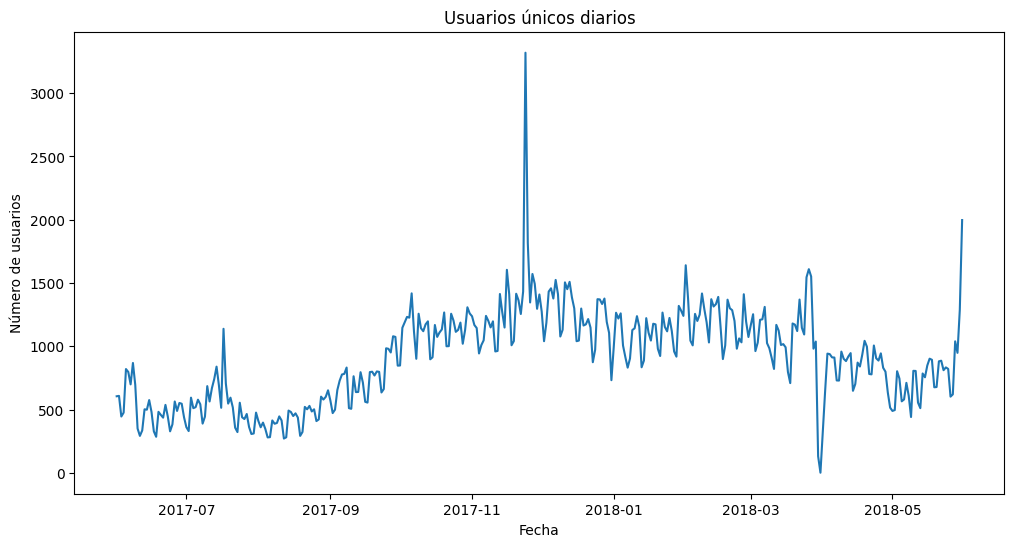

In [59]:
# Gráfico de usuarios únicos diarios
plt.figure(figsize=(12, 6))
daily_users.plot(title='Usuarios únicos diarios')
plt.xlabel('Fecha')
plt.ylabel('Número de usuarios')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien! Me gusta el gráfico, es claro y refleja bien los resultados que obtuviste.

El gráfico anterior muestra los usuarios únicos que hay por día. Vemos que en fechas como en el 2017-12 hay un incremento en el  número de úsuarios que visitan el sitio. Esto se puede deber a que hay personas pensando ya en que eventos hay para el 2018 y como los pueden bookear para poder adquirir los boletos a los eventos a un mejor precio. Para el 2018-04 vemos que hay una disminución en el número de usuarios y vuelve a subír para el 2018-06. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Excelentes conclusiones!

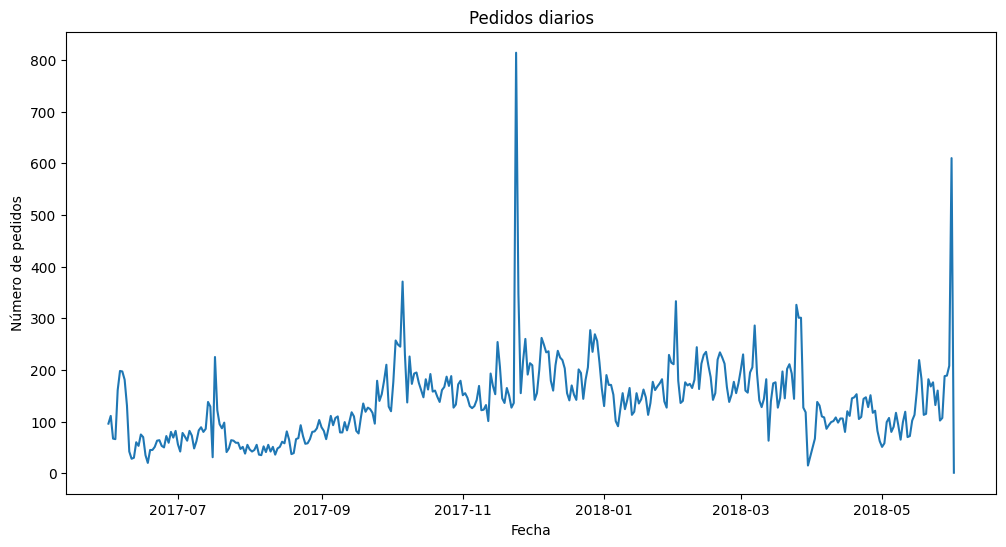

In [45]:
# Gráfico de pedidos diarios
plt.figure(figsize=(12, 6))
daily_orders.plot(title='Pedidos diarios')
plt.xlabel('Fecha')
plt.ylabel('Número de pedidos')
plt.show()

Al gráfico anterior muestra los usuarios únicos que hay por día. Vemos que en fechas como en el 2017-12 hay un incremento en el  número de úsuarios que visitan el sitio. Esto se puede deber a que hay personas pensando ya en que eventos hay para el 2018 y como los pueden bookear para poder adquirir los boletos a los eventos a un mejor precio. Para el 2018-04 vemos que hay una disminución en el número de usuarios y vuelve a subír para el 2018-06. 